In [97]:
# import libraries to use (pandas, matplotlib.pyplot and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
pd.options.display.max_rows = 100
%matplotlib inline

In [98]:
customer_analysis = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

customer_analysis.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


### Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals

In [99]:
numerical = customer_analysis.select_dtypes(include=np.number)
categorical = customer_analysis.select_dtypes(include=object)


In [100]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


### Now we will try to check the normality of the numerical variables visually
##### Use seaborn library to construct distribution plots for the numerical variables


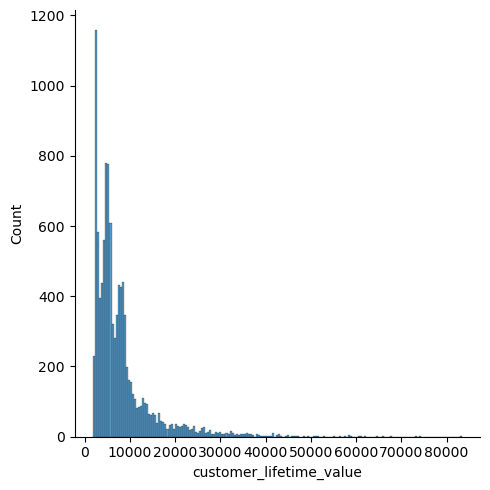

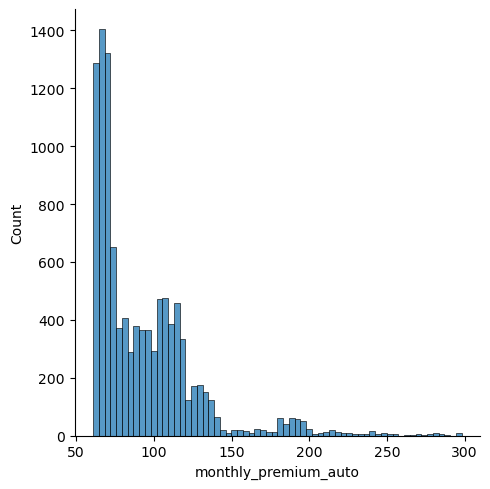

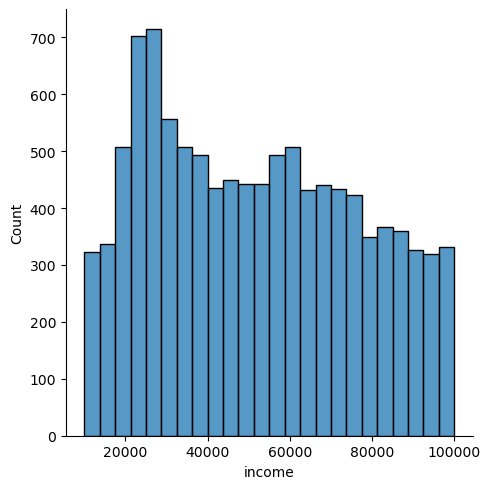

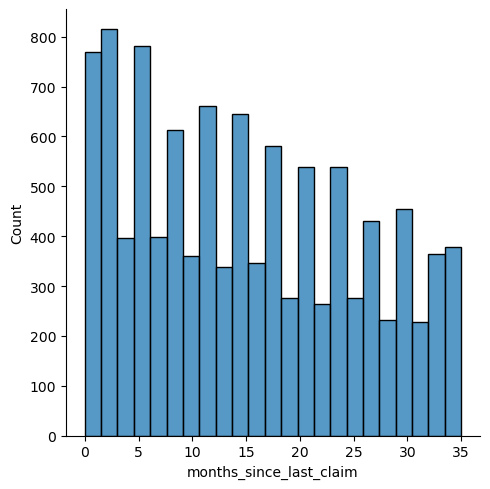

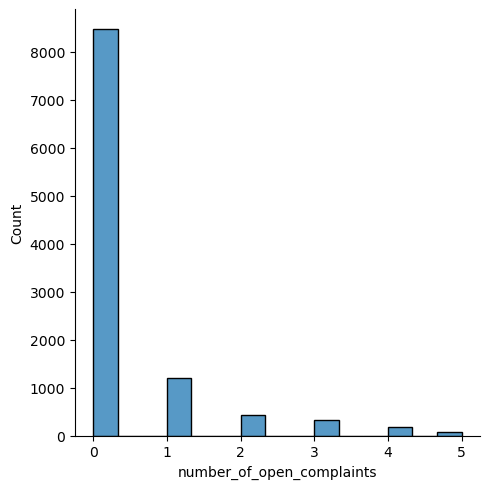

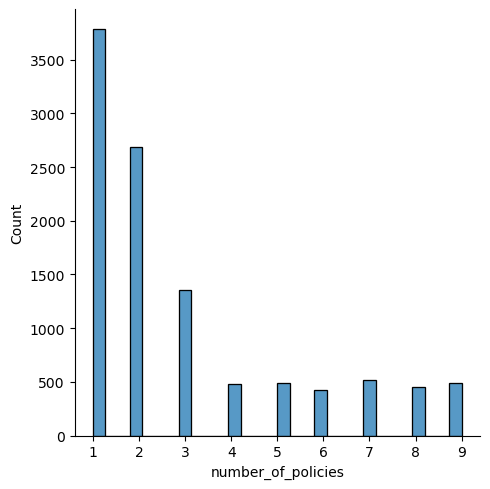

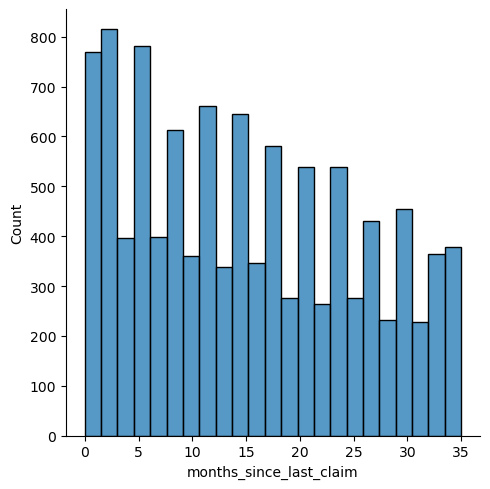

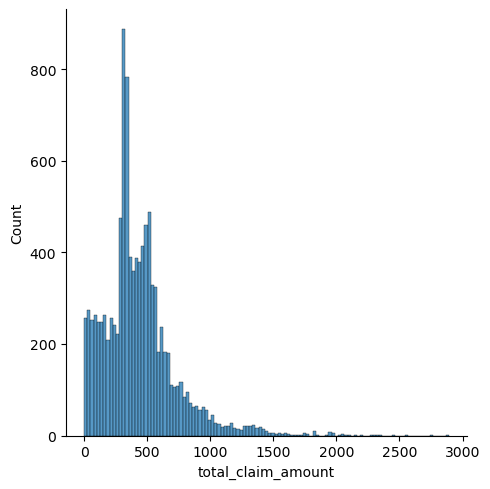

In [101]:
sns.displot(numerical["customer_lifetime_value"])
sns.displot(numerical["monthly_premium_auto"])
sns.displot(numerical["income"])
sns.displot(numerical["months_since_last_claim"])
sns.displot(numerical["number_of_open_complaints"])
sns.displot(numerical["number_of_policies"])
sns.displot(numerical["months_since_last_claim"])
sns.displot(numerical["total_claim_amount"])

##### Use Matplotlib to construct histograms.


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

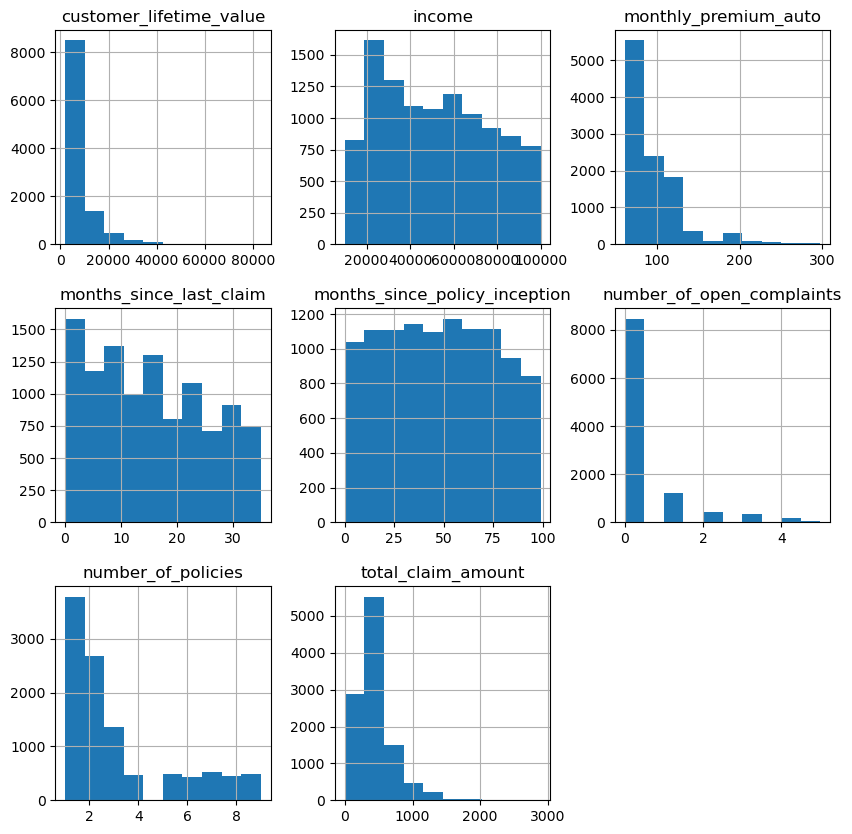

In [102]:
numerical.hist(figsize=(10,10))

##### Do the distributions for different numerical variables look like a normal distribution?

I'm not sure

### For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.

In [103]:
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


### Plot the Correlation Heatmap.

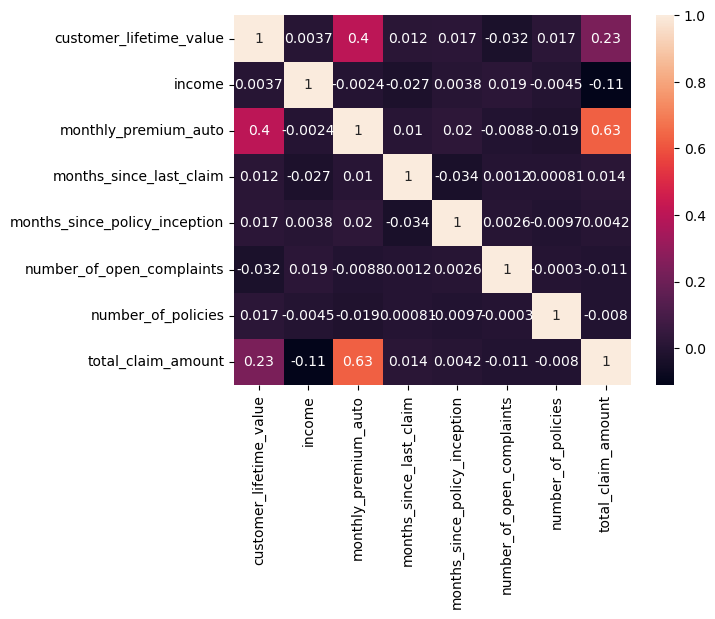

In [104]:
sns.heatmap(numerical.corr(), annot=True);

### Show a plot of the total number of responses.



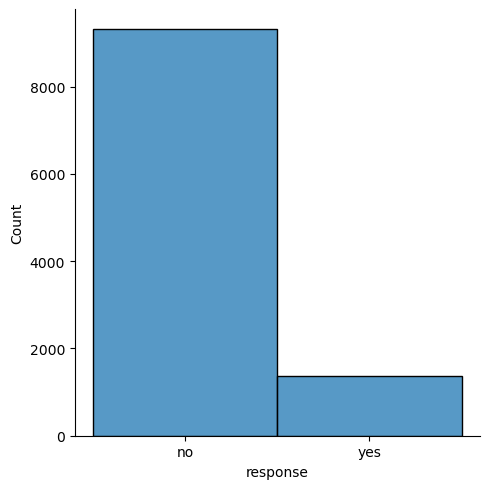

In [115]:
sns.displot(categorical["response"])

In [106]:
categorical["response"].value_counts()

no     9316
yes    1373
Name: response, dtype: int64

### Show a plot of the response by the sales channel.

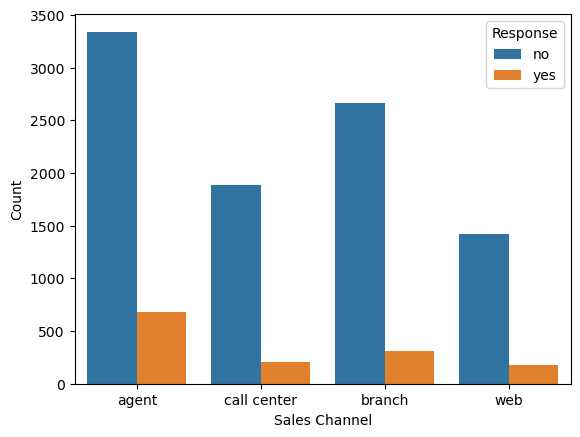

In [107]:
#sns.displot(categorical["sales_channel"])
#plt.legend(title="Response")

sns.countplot(x='sales_channel', hue='response', data=categorical)
plt.xlabel("Sales Channel")
plt.ylabel("Count")
plt.legend(title="Response")

### Show a plot of the response by the total claim amount.

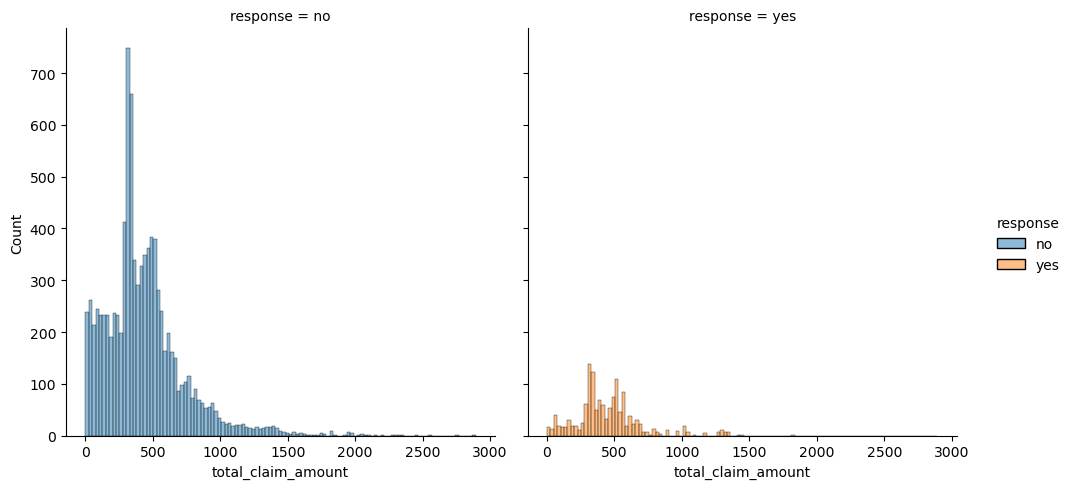

In [120]:
sns.displot(col='response', x='total_claim_amount', hue='response', data=customer_analysis)

### Show a plot of the response by income.

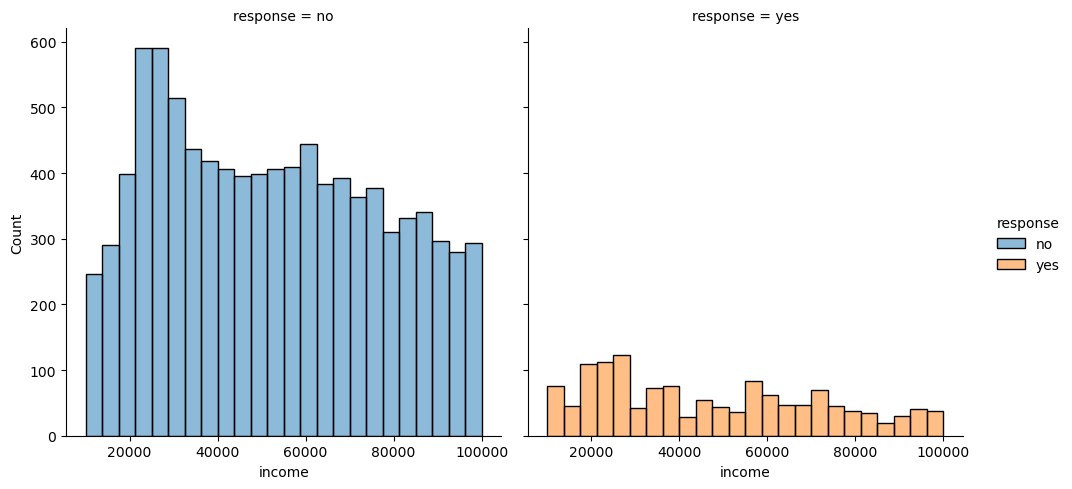

In [118]:
sns.displot(data=customer_analysis, x="income", hue="response", col="response")

### Clean your notebook and make it readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.